In [1]:
import os

folder = os.path.join('/', 'Users', 'snair', 'works', 'dislock-experiments', 'dislocksim')



In [17]:
# data processing

def get_time(line):
    parts = line.strip().split(':')
    time_part = parts[3].strip()
    return float(time_part)*1000.0


def get_log(folder):
    result = {}
    if os.path.isfile(os.path.join(folder, 'log.txt')):
        with open(os.path.join(folder, 'log.txt')) as f:
            result['read-acquire'] = []
            result['read-release'] = []
            result['write-acquire'] = []
            result['write-release'] = []
            for line in f.readlines():
                if line.strip().startswith('time to acquire read lock :'):
                    time = get_time(line)
                    result['read-acquire'] += [time]
                elif line.strip().startswith('time to release read lock :'):
                    time = get_time(line)
                    result['read-release'] += [time]
                elif line.strip().startswith('time to acquire write lock :'):
                    time = get_time(line)
                    result['write-acquire'] += [time]
                elif line.strip().startswith('time to release write lock :'):
                    time = get_time(line)
                    result['write-release'] += [time]
                        
    return result


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_plots(data, name=''):
    fig, ax = plt.subplots(figsize=(14,8))
    x_pos = np.arange(len(data))
    for d in data:
        for val in data[d]:
            ax.plot(d, val, 'x', color='blue')
        
    plt.xticks(rotation=90)
    plt.grid(axis='y')
#     plt.savefig(name2+'/raw'+name1+'.png')
#     plt.savefig(name2+'/raw'+name1+'.eps', format='eps')
    plt.show()

{'read-acquire': [85.338, 125.51799999999999, 134.102, 97.306, 127.528, 140.511, 134.855, 92.357, 163.826, 151.809, 174.208, 190.732, 163.442, 138.817, 161.74099999999999, 102.645, 109.659, 125.72500000000001, 91.1, 106.759, 169.05100000000002, 115.90899999999999, 140.087, 115.338, 170.22699999999998, 115.772, 110.368, 119.582, 115.783, 102.81, 166.406, 124.82600000000001, 146.40900000000002, 108.00800000000001, 103.142, 147.613, 115.953, 150.14600000000002, 138.409, 80.13199999999999, 101.65, 122.661, 153.916, 124.33800000000001, 153.114, 120.399, 133.76, 103.51100000000001, 88.842, 103.071, 139.397, 90.252, 139.574, 100.155, 148.875, 98.408, 127.99199999999999, 83.783, 89.213, 101.887, 131.70200000000003, 102.912, 91.722, 137.742, 144.38899999999998, 146.113, 131.34199999999998, 150.704, 116.964, 98.40400000000001, 138.484, 89.007, 155.487, 125.44, 87.65100000000001, 99.354, 97.08200000000001, 99.015, 115.512, 116.131, 113.84700000000001, 124.53599999999999, 118.51100000000001, 113.0

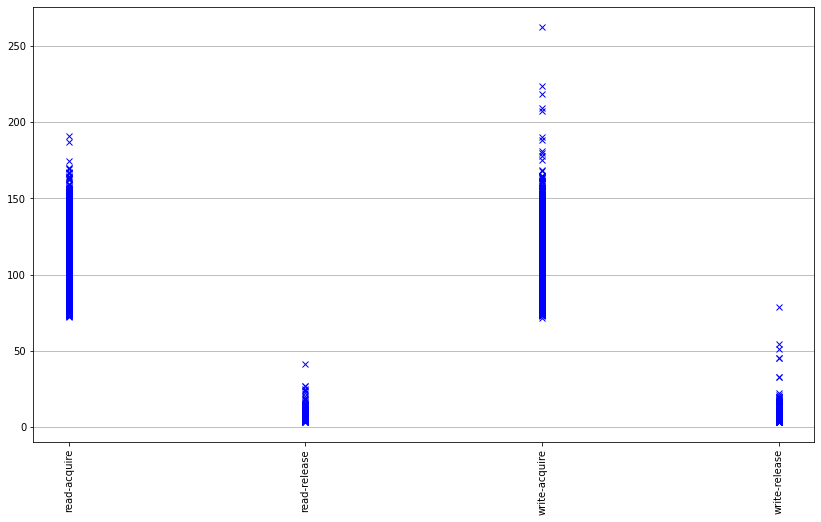

In [19]:
data = get_log(folder)
print(data)
generate_plots(data)

In [20]:
for d in data:
    print(d)
    print('99th:', np.percentile(data[d],99),'95th', np.percentile(data[d],95),'90th', np.percentile(data[d],90),'50th', np.percentile(data[d],50))

read-acquire
99th: 164.51558 95th 152.26665 90th 148.04690000000002 50th 115.6825
read-release
99th: 17.89465 95th 10.272849999999993 90th 7.165200000000002 50th 4.717
write-acquire
99th: 174.89261 95th 152.64464999999998 90th 147.58119999999997 50th 116.434
write-release
99th: 19.892339999999997 95th 10.595499999999998 90th 7.4338000000000015 50th 4.725
